In [4]:
from graph_agent import GraphAgent

%reload_ext autoreload
%autoreload 2

In [5]:
graph_agent = GraphAgent()
graph_agent.create_vector_db()

[22:54:59 +0000] [INFO]: Graph 'OPEN_INTELLIGENCE' exists.
[22:54:59 +0000] [INFO]: Default node type set to 'Actor'
 2025-02-21 22:55:01,766 - INFO - Creating vector database
 2025-02-21 22:55:01,766 - INFO - Creating vector database
 2025-02-21 22:55:01,766 - INFO - Creating vector database
100%|██████████| 626/626 [09:11<00:00,  1.14it/s]


KeyError: 'Column subgraph does not exist in schema'

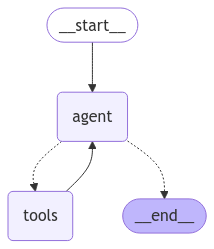

In [18]:
from IPython.display import Image, display
Image(graph_agent.agent.get_graph().draw_mermaid_png())

In [19]:

print(graph_agent.query_graph("who are you?"))

I am a graph agent designed to help translate natural language queries into graph database queries and perform graph-based algorithms. Whether you're looking for data retrieval or analysis of graph networks, I'm here to help you explore and understand the graph data. How can I assist you today?


In [20]:
graph_agent.query_graph(query = "how many countries are there in the graph?")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Country
RETURN LENGTH(
  FOR country IN Country
    COLLECT WITH COUNT INTO total
    RETURN total
)

AQL Result:
[None]

> Finished chain.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Country
RETURN LENGTH((FOR c IN Country RETURN c))

AQL Result:
[22]

> Finished chain.


'There are 22 countries in the graph.'

In [21]:
graph_agent.query_graph("what is the most impactful node of type event in the graph? explain why")


* Generating NetworkX code
import networkx as nx

# Step 1: Identify event nodes.
# In our schema, event nodes come from the "Event" collection.
# We assume that the node ids for events start with "Event/".
event_nodes = [node for node, attr in G_adb.nodes(data=True) if str(node).startswith("Event/")]

# Step 2: Compute degree centrality for all nodes using NetworkX's built-in function.
centrality = nx.degree_centrality(G_adb)

# Step 3: Filter the centrality scores to only include event nodes.
event_centrality = {node: centrality[node] for node in event_nodes if node in centrality}

# Step 4: Identify the event node with the highest centrality.
if event_centrality:
    best_event = max(event_centrality, key=event_centrality.get)
    best_score = event_centrality[best_event]
else:
    best_event = None
    best_score = None

# Step 5: Set the FINAL_RESULT variable with a short, concise answer.
FINAL_RESULT = f"The most impactful event is {best_event} with a degree centrality of {best_

thread 'tokio-runtime-worker' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:279:26:
Could not send to channel!: SendError { .. }
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace
thread '<unnamed>' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:285:21:
called `Result::unwrap()` on an `Err` value: JoinError::Panic(Id(1708), ...)



* Generating NetworkX code
import networkx as nx

# Compute degree centrality for all nodes in the graph
centrality = nx.degree_centrality(G_adb)

# Filter nodes that are of type 'event'. Here we assume event nodes have IDs starting with "Event/"
event_nodes = {node: score for node, score in centrality.items() if isinstance(node, str) and node.startswith("Event/")}

# Identify the event node with the highest centrality score
if event_nodes:
    most_impactful_event = max(event_nodes, key=event_nodes.get)
    highest_score = event_nodes[most_impactful_event]
    # Explanation: this node is most impactful because it has the highest degree centrality,
    # meaning it is the most connected node, linking to various related nodes (such as actors,
    # locations, sources, etc.) and thus holds a critical position in the graph.
    FINAL_RESULT = f"{most_impactful_event} is the most impactful event (degree centrality: {highest_score:.3f})."
else:
    FINAL_RESULT = "No event nodes found." 



thread 'tokio-runtime-worker' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:279:26:
Could not send to channel!: SendError { .. }
thread '<unnamed>' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:285:21:
called `Result::unwrap()` on an `Err` value: JoinError::Panic(Id(2041), ...)



* Generating NetworkX code
import networkx as nx

# Assuming that event nodes have an identifier that starts with "Event/"
event_nodes = [n for n, attr in G_adb.nodes(data=True) if str(n).startswith('Event/')]

# Compute degree centrality using NetworkX's degree_centrality function.
deg_centrality = nx.degree_centrality(G_adb)

# Filter degree centrality to only include event nodes.
event_centrality = {node: deg_centrality[node] for node in event_nodes if node in deg_centrality}

# Identify the event node with the highest degree centrality.
most_influential_event = max(event_centrality, key=event_centrality.get)

# Explanation: A higher degree centrality means the node has more direct connections
# to various other nodes (like Actors, Locations, Sources, etc.), indicating that the event
# is more central and influential in the graph's topology.
FINAL_RESULT = (f"{most_influential_event} is the most influential event node with a degree centrality "
                f"of {event_centralit

thread 'tokio-runtime-worker' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:279:26:
Could not send to channel!: SendError { .. }
thread '<unnamed>' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/arangors-graph-exporter-0.0.9/src/sharding.rs:285:21:
called `Result::unwrap()` on an `Err` value: JoinError::Panic(Id(2402), ...)



* Executing code
FINAL_RESULT: None

* Formulating final answer

* Generating NetworkX code
import networkx as nx

# Step 1: Filter nodes that are of type "event"
# We'll first try to get nodes by checking the node attribute "type", if it exists, otherwise we filter by node id prefix "Event/"
event_nodes = [n for n, data in G_adb.nodes(data=True) if data.get('type', '').lower() == 'event']
if not event_nodes:
    # Fallback: assume event nodes have IDs starting with "Event/"
    event_nodes = [n for n in G_adb.nodes() if isinstance(n, str) and n.startswith("Event/")]

# Step 2: Compute betweenness centrality for the entire graph using NetworkX algorithm
centrality = nx.betweenness_centrality(G_adb)

# Step 3: Filter centrality values for event nodes only
event_centrality = {n: centrality.get(n, 0) for n in event_nodes}

# Step 4: Determine the event node with the highest centrality measure
if event_centrality:
    most_impactful_event = max(event_centrality, key=event_centrality.get)


KeyboardInterrupt: 

In [22]:
graph_agent.query_graph("how many nodes and connections are there in the graph?")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Event, Actor, Location, Source, Country, Region, Class, eventActor, hasLocation, hasSource, inCountry, inRegion, subClass, type
LET eventCount = LENGTH(FOR v IN Event RETURN v)
LET actorCount = LENGTH(FOR v IN Actor RETURN v)
LET locationCount = LENGTH(FOR v IN Location RETURN v)
LET sourceCount = LENGTH(FOR v IN Source RETURN v)
LET countryCount = LENGTH(FOR v IN Country RETURN v)
LET regionCount = LENGTH(FOR v IN Region RETURN v)
LET classCount = LENGTH(FOR v IN Class RETURN v)
LET nodeCount = eventCount + actorCount + locationCount + sourceCount + countryCount + regionCount + classCount
LET eventActorCount = LENGTH(FOR e IN eventActor RETURN e)
LET hasLocationCount = LENGTH(FOR e IN hasLocation RETURN e)
LET hasSourceCount = LENGTH(FOR e IN hasSource RETURN e)
LET inCountryCount = LENGTH(FOR e IN inCountry RETURN e)
LET inRegionCount = LENGTH(FOR e IN inRegion RETURN e)
LET subClassCount = LENGTH(FOR e IN subClass RETU

'Your graph contains a total of 80,047 nodes along with 321,819 connections between them.'

In [23]:
graph_agent.query_graph("how many nodes and connections are there in the graph? use networkx code")


* Generating NetworkX code
import networkx as nx

# Using the pre-built graph object G_adb
num_nodes = G_adb.number_of_nodes()
num_edges = G_adb.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of connections (edges): {num_edges}")

FINAL_RESULT = {"nodes": num_nodes, "edges": num_edges}
Number of nodes: 80047
Number of connections (edges): 321819

* Executing code
FINAL_RESULT: {'nodes': 80047, 'edges': 321819}

* Formulating final answer


'There are 80,047 nodes and 321,819 connections (edges) in the graph.'

In [24]:
graph_agent.query_graph("tell me more about the event 'The Battle of the Bulge'? use vector search" )

'Based on a vector search, there isn’t any detailed information about an event called "The Battle of the Bulge." It appears that our current records do not include nodes or metadata covering that event. Would you like to search using other terms, or would you like assistance with a different inquiry?'

In [25]:
graph_agent.vector_qa("tell me more about the event 'Orma youth attack journalists'? use vector search")

'Based on the provided context, there are two entries for the event "Orma youth attack journalists." Here are the details from the nodes:\n\n• Both entries indicate that the event involved Orma youth attacking journalists who were covering a peace meeting.  \n• The event is dated January 12, 2013 (with the date stamp 1357948800000.0).  \n• No fatalities were reported (fatalities: 0.0).  \n• The geo-coordinates provided are [-2.47, 40.191].  \n• It is categorized under the label “Violence_against_civilians” and identified as an Event with the unique key KEN3592.\n\n(Source: "Orma youth attack journalists" node, key KEN3592)'

In [26]:
graph_agent.query_graph("how many nodes are connected to the event named  'A man from Mugendo hill of Muh'? use vector search and networkx code")


* Generating NetworkX code
import networkx as nx

node_id = "Event/BUR8472"
neighbors = set()

if G_adb.has_node(node_id):
    if G_adb.is_directed():
        # For directed graphs, consider both predecessors and successors.
        neighbors = set(G_adb.predecessors(node_id)) | set(G_adb.successors(node_id))
    else:
        # For undirected graphs, neighbors method is sufficient.
        neighbors = set(G_adb.neighbors(node_id))

FINAL_RESULT = len(neighbors)

* Executing code
FINAL_RESULT: 5

* Formulating final answer


'The event node "A man from Mugendo hill of Muh" (with _key: BUR8472) is connected to 5 other nodes in the graph.'

In [35]:
event_nodes = [n for n, attr in graph_agent.G_adb.nodes(data=True) if attr.get('name') == 'Orma youth attack journalists']

In [ ]:
node

'Event/BUR8472'

In [ ]:
node

'Event/BUR8472'

In [39]:
node

'Event/BUR8472'

In [40]:
data

{'_id': 'Event/BUR8472', '_key': 'BUR8472', 'date': '2018-08-27T00:00:00.000Z', 'dateStamp': 1535328000000, 'description': 'A man from Mugendo hill of Muhuta area in Rumonge province was stoned by residents of the hill on August 27, 2018. The assailants accused him of having killed a woman and her child through bewitchment.', 'fatalities': 0, 'geo': {'coordinates': [-2.47, 30.262], 'type': 'Point'}, 'label': 'Riots', 'name': 'A man from Mugendo hill of Muh'}

In [42]:
len(list(graph_agent.G_adb.nodes()))

80047

In [48]:
import pandas

In [57]:
df = pandas.DataFrame([data for _, data in graph_agent.G_adb.nodes(data=True)])
df['node_type'] = df['_id'].apply(lambda x: x.split('/')[0])
df

,_id,_key,date,dateStamp,description,fatalities,geo,label,name,sourceScale,node_type
0,Event/ALG5727,ALG5727,2018-12-10T00:00:00.000Z,1.544400e+12,"On 10 December, families of individuals who we...",0.0,"[coordinates, type]",Protests,"On 10 December, families of in",NaN,Event
1,Event/DRC6092,DRC6092,2012-05-12T00:00:00.000Z,1.336781e+12,Two government soldiers and a ranger were kill...,3.0,"[coordinates, type]",Battles,Two government soldiers and a,NaN,Event
2,Event/BUR2862,BUR2862,2010-07-15T00:00:00.000Z,1.279152e+12,2 people were killed by unidentified armed men...,2.0,"[coordinates, type]",Violence_against_civilians,2 people were killed by uniden,NaN,Event
3,Event/ANG1330,ANG1330,1999-06-06T00:00:00.000Z,9.286272e+11,"6/6/1999 ,Malanje, A Capital; Diario de Notici...",0.0,"[coordinates, type]",Battles,"Malanje, A Capital; Diario de",NaN,Event
4,Location/ff4d5692500f10a3f59a3f5eda7d64fb,ff4d5692500f10a3f59a3f5eda7d64fb,NaN,NaN,NaN,NaN,NaN,NaN,Camucuio,NaN,Location
...,...,...,...,...,...,...,...,...,...,...,...
80042,Event/BUR5556,BUR5556,2016-04-14T00:00:00.000Z,1.460592e+12,Rioters threw stones at the home of the head I...,0.0,"[coordinates, type]",Riots,Rioters threw stones at the ho,NaN,Event
80043,Event/DRC60,DRC60,1997-02-23T00:00:00.000Z,8.566560e+11,ADLF rebels advance on and take control of the...,0.0,"[coordinates, type]",Strategic_developments,ADLF rebels advance on and tak,NaN,Event
80044,Event/BUR7870,BUR7870,2018-04-29T00:00:00.000Z,1.524960e+12,"On 29 April, a young UPRONA member in Bugendan...",0.0,"[coordinates, type]",Violence_against_civilians,"On 29 April, a young UPRONA me",NaN,Event
80045,Event/KEN6326,KEN6326,2018-06-03T00:00:00.000Z,1.527984e+12,03 June. Students at a girl's boarding school ...,0.0,"[coordinates, type]",Protests,03 June. Students at a girl's,NaN,Event


In [58]:
df.node_type.value_counts()

node_type
Event       65534
Location     8779
Source       3420
Actor        2256
Class          31
Country        22
Region          5
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80047 entries, 0 to 80046
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          80047 non-null  object 
 1   _key         80047 non-null  object 
 2   date         65534 non-null  object 
 3   dateStamp    65534 non-null  float64
 4   description  65534 non-null  object 
 5   fatalities   65534 non-null  float64
 6   geo          65534 non-null  object 
 7   label        65534 non-null  object 
 8   name         80047 non-null  object 
 9   sourceScale  3420 non-null   object 
 10  node_type    80047 non-null  object 
dtypes: float64(2), object(9)
memory usage: 6.7+ MB
